# Global Solution: Cyber Security

RM 94199 - Matias Cornelsen Herklotz

RM 93821 - Gustavo Jordão Santos

RM 94026 - Daniel Faria de Barros

## Importando Bibliotecas

In [77]:
#df
import pandas as pd

#graphs
import matplotlib.pyplot as plt
import seaborn as sns

#train test spli
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix

#scaler
from sklearn.preprocessing import MinMaxScaler

# Modelo
from sklearn.neural_network import MLPClassifier

# Apenas para evitar warnings
import warnings
warnings.filterwarnings('ignore')



## Código

### Analisando a Database

In [78]:
df = pd.read_csv("./PS.csv")

In [79]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [81]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

### Retirando colunas que não consideramos necessarias:
- Name Origin
- Name Dest

In [82]:
df.drop(columns=["nameDest","nameOrig"],inplace=True)
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


### Retirando linhas duplicadas

In [83]:
df.drop_duplicates(inplace=True)
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


### Retirando linhas com dados faltantes

In [84]:
df.dropna(inplace=True)
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [85]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362077e+06,6.362077e+06,6.362077e+06,6.362077e+06,6.362077e+06,6.362077e+06,6.362077e+06,6.362077e+06
mean,2.433995e+02,1.798531e+05,8.339307e+05,8.551867e+05,1.100796e+06,1.225077e+06,1.288416e-03,2.514902e-06
std,1.423323e+02,6.036937e+05,2.888322e+06,2.924163e+06,3.399310e+06,3.674244e+06,3.587138e-02,1.585842e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.339407e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.489334e+04,1.421800e+04,0.000000e+00,1.327834e+05,2.147385e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087330e+05,1.073260e+05,1.442925e+05,9.431718e+05,1.112051e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Graficos

### Fizemos um grafico para saber como estavam distribuidos os Labels, e podemos perceber a seguir, que os dados nao estão muito bem distribuidos, ja excluindo a possibilidade de utilizarmos acuracia como métrica.

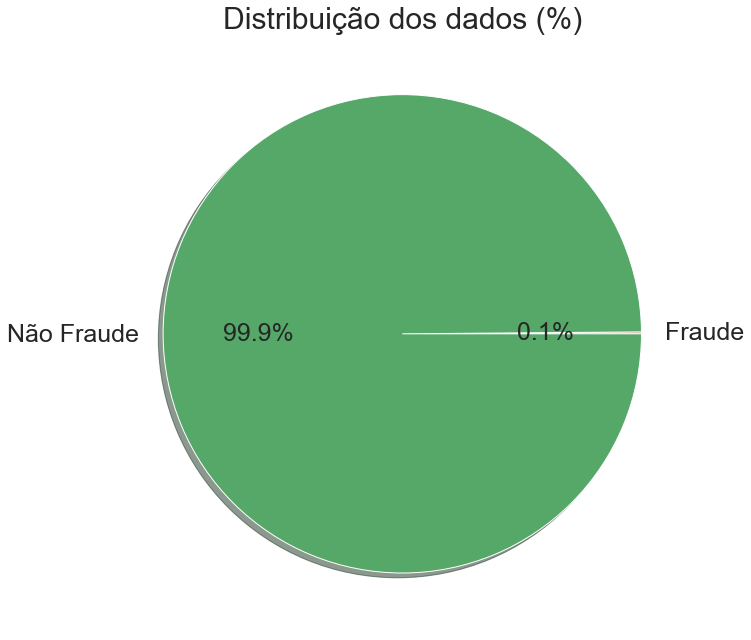

In [86]:
fraud = df[df.isFraud==1].count()
nfraud = df[df.isFraud==0].count()
quantidade = (fraud["isFraud"],nfraud["isFraud"])

plt.figure(figsize=(11,11))
plt.pie(autopct="%1.1f%%",x=quantidade,labels=("Fraude","Não Fraude"),shadow=True,colors=('r','g'),textprops={'fontsize': 25})

plt.title("Distribuição dos dados (%)",fontsize=30)


plt.show()

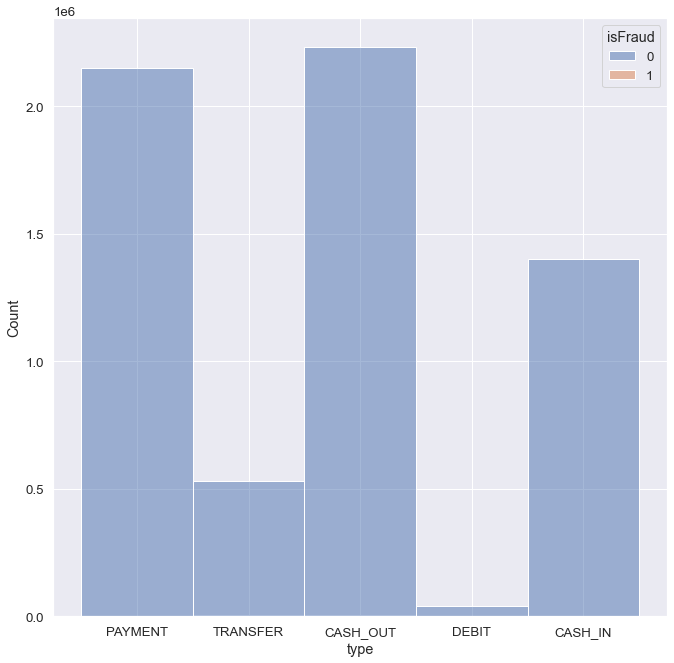

In [87]:

plt.figure(figsize=(11,11))
sns.histplot(data=df, x="type", hue="isFraud")
plt.show()

### Conforme o exemplo acima, os graficos que tentavamos fazer ficavam muito dificeis de interpretar devido a forma como os dados estavam distribuidos, entao fizemos uma database apenas com os dados classificados como Fraude para montar os graficos.

In [88]:
dfFraud = df[df["isFraud"]==1]
dfFraud

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0


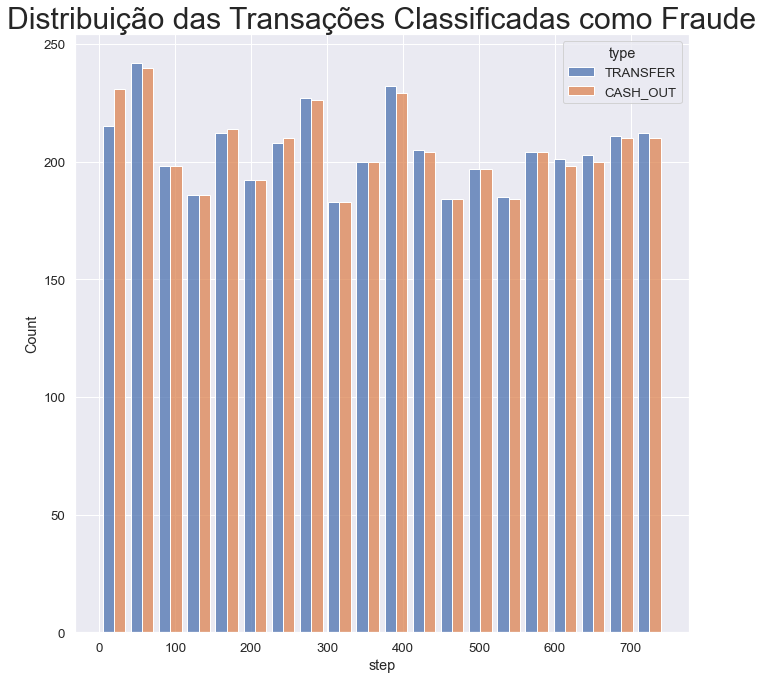

In [89]:
plt.figure(figsize=(11,11))
plt.title("Distribuição das Transações Classificadas como Fraude",fontsize=30)
sns.set(font_scale = 1.2)
sns.histplot(data=dfFraud, x="step", hue="type",multiple="dodge", shrink=.8)
plt.show()

### Com a interpretação desse grafico, chegamos na conslusão que que dos 5 tipos de transação, apenas as Trasnferencias e saques possuem casos de fraude.

## Modelagem preditiva: esta trasação é uma fraude?

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362077 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 485.4+ MB


### De todas as colunas, a unica não numerica é a do tipo de transação, então iremos utilizar Dummies para dividir os dados dessa coluna para 5 novas colunas

In [91]:
dummies = pd.get_dummies(df['type'])
dummies

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


In [92]:
df = pd.concat( [df, dummies], axis=1 )
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,0,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,0,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,0,1


In [93]:
df.drop(columns=['type'],inplace=True)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,0,1


In [94]:
df.dtypes

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
CASH_IN             uint8
CASH_OUT            uint8
DEBIT               uint8
PAYMENT             uint8
TRANSFER            uint8
dtype: object

### Separando os dados em treino e teste

In [97]:
X = df.drop(columns=["isFraud"])
Y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=22)

### Escalando os dados

In [105]:
minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)

X_test_scaled = minmax.transform(X_test)

### Definindo a funcao para calcular as metricas
- Como vimos anteriormente devido a distribuição dos dados, não podemos nos basear no score de Accuracy, e devido a situação do problema trabalhado, Escolhemos o Recall pois queremos garantir que as transações fraudadoras sejam impedidas, e tambem escolhemos o F1-Score para ter uma visão mais equilibrada do desempenho.

In [106]:
def metrics(y_test,y_pred):

    acc = accuracy_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    pre = precision_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    print(f"Accuracy: {acc:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"Precision: {pre:.2f}")
    print(f"\033[92m\033[1mF1_score: {f1:.2f}\033[0m")

### Definindo a funcao para o modelo de MLP
- O modelo escolhido foi o de MLP, pois seria o mais completo que

In [109]:
def mlp(X_train,X_test,y_train,y_test):
    mlp = MLPClassifier(hidden_layer_sizes=(50,50),
                   random_state=1,
                   activation="logistic",
                   solver="adam",
                   learning_rate="adaptive",
                   max_iter=500)

    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    plot_confusion_matrix(mlp, X_test, y_test, cmap="Greens")
    metrics(y_test,y_pred)

In [ ]:
mlp(X_train_scaled,X_test_scaled,y_train,y_test)